In [ ]:
# pip install scipy

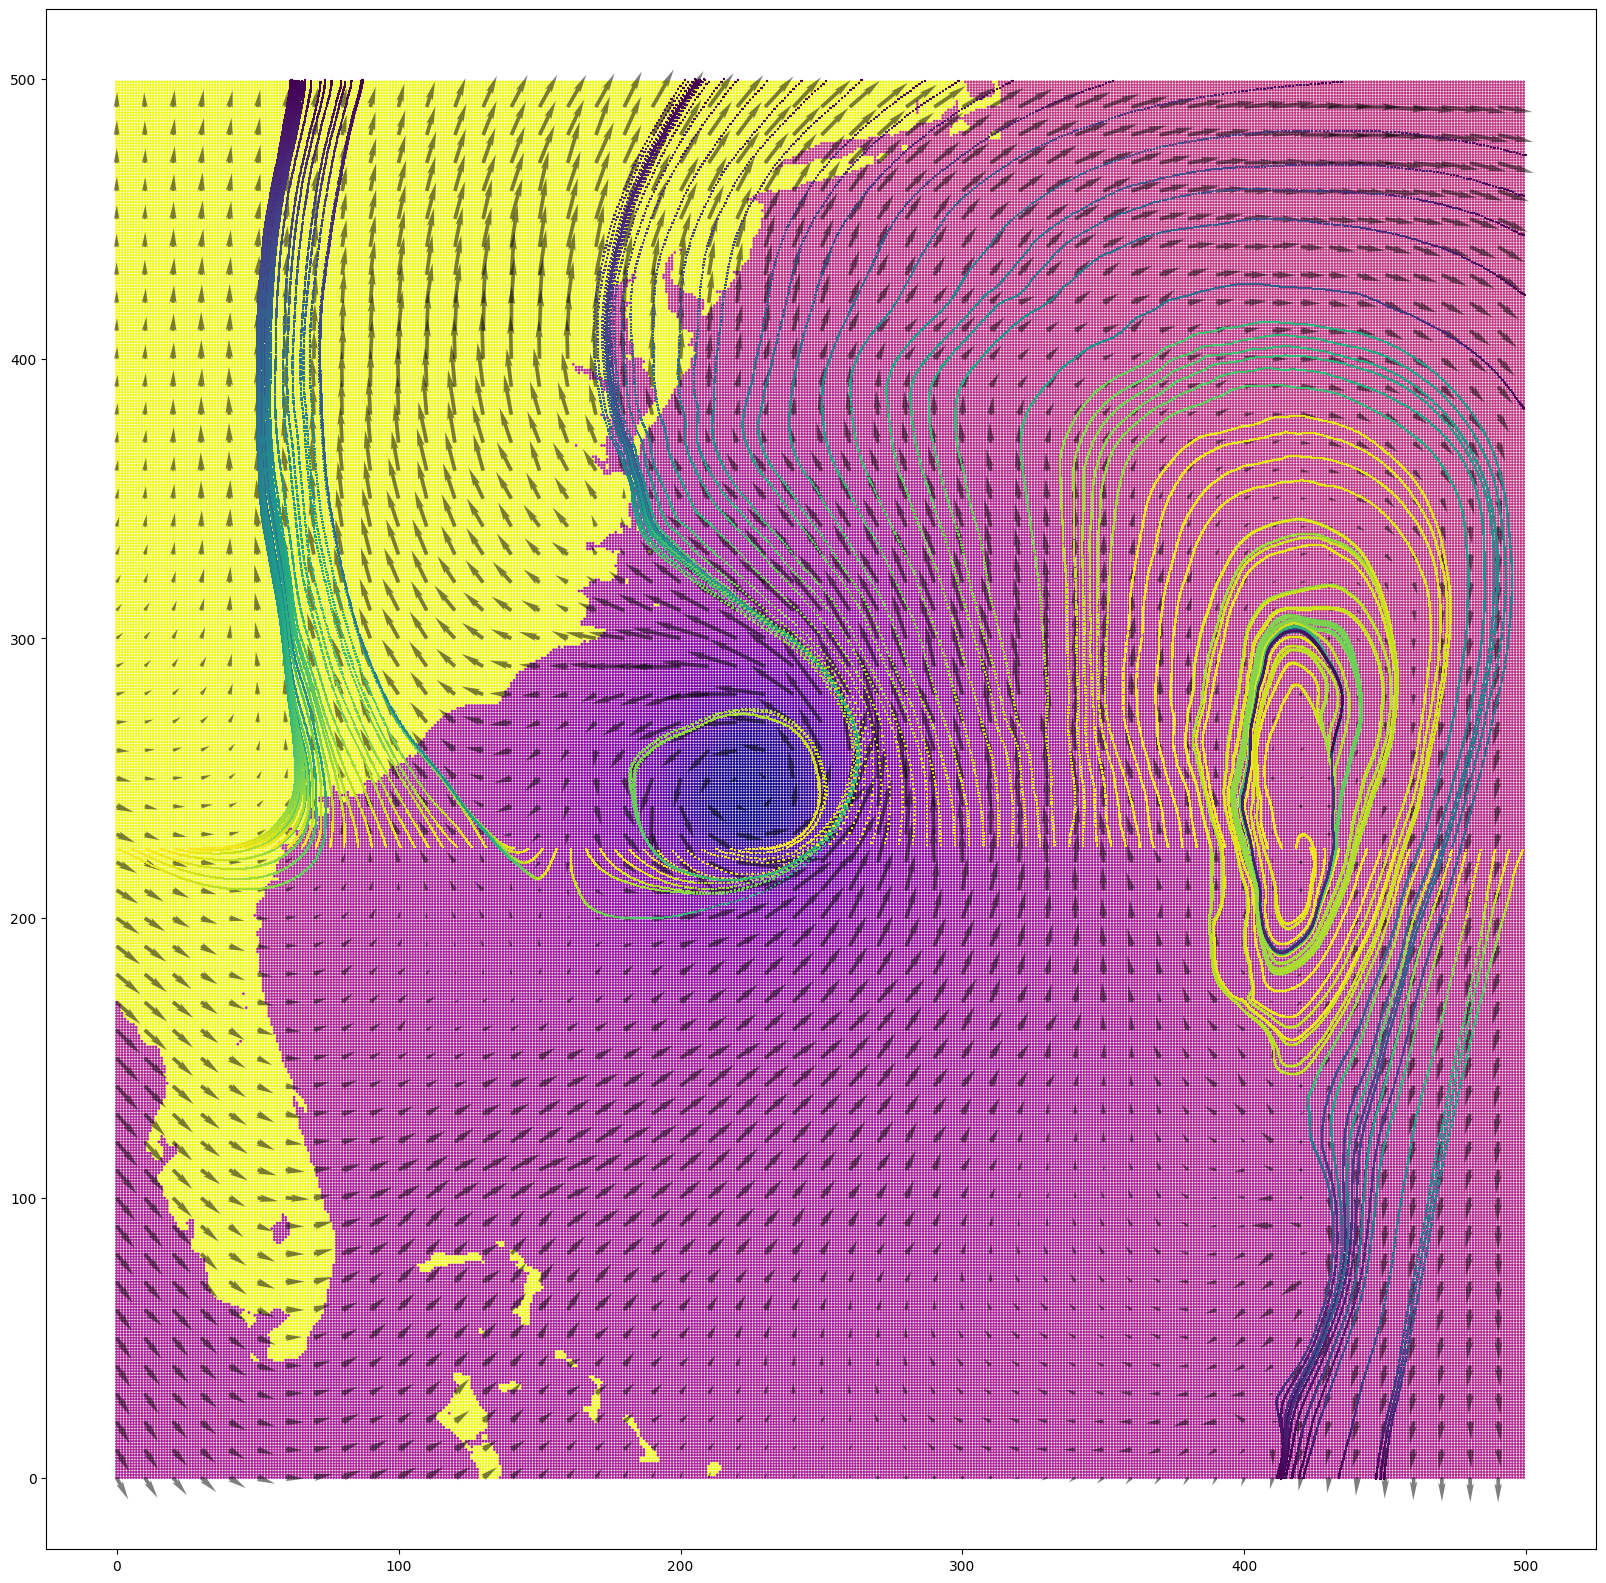

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import math

uData = []
vData = []

##### data loading and setup/plot image
##### argument "showBgMap": show or not to show the background map
##### DO NOT modify this function
def Initialize( showBgMap = True ):
    global uData
    global vData
    
    loadFlowData = np.load("flowData.npy",allow_pickle=True)

    ### flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]
    
    ### plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')
    
    ### plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')       
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale = 50,  headwidth = 2, headlength = 5, alpha = 0.5)


##### x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
##### return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
##### DO NOT modify this function
def getDataVector(x, y):
    return uData[(499-y)+500*x], vData[(499-y)+500*x]


##### this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
##### Return: seeds -> a list of [x, y] 
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds )
    y = np.linspace(startY, endY, numSeeds )
    seeds = np.zeros([numSeeds,2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

##### this function plot a particle tracing result on the screen
##### argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
##### You may not want to modify this function
def drawOneParticleTracingResult( path ):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:,0], ps[:,1], c=c, s=3, marker='_')

##### (TODO) WORK on this function
##### compute ONE particle tracing result
##### you should use "getDataVector())" to get the vector you want on the grid point
##### if you need the vector between grid points, you have to implment the vector interpolation by your self
##### I do not mind the computation is efficnet or not
##### "seed": one seed (x,y)
##### "t": delta t (i suggest 0.025)
##### "steps": how many stesp for this particle tracing process
def particleTrace(seed, t, steps):
    # implement RK4 Algorithm
    path = []
    for i in range(steps):
        if(seed[0] <= 499 and seed[0] >= 0 and seed[1] <= 499 and seed[1] >= 0):
            seed_u_value,seed_v_value = getPositionandReturnData(seed)
            # print(seed_u_value,seed_v_value)
            new_x_pos = RK4(seed[0],seed_u_value,t)
            new_y_pos = RK4(seed[1],seed_v_value,t)
            new_pos = [new_x_pos,new_y_pos]
            # new_pos = np.array(new_pos)
            path.append(new_pos)
            # print(path)
            seed = new_pos
        else:
            break
    # print(path)
    return path


def RK4(p,v ,t):
    #p = x or y position
    #v = datavalue of seed could be u or var
    #t - steps
    # all integers
    a = 2*t*v
    b = 2*t*(v+a/2)
    c = 2*t*(v+b/2)
    d = 2*t*(v+c/2)
    p_next = p+(a+2*b+2*c+d)/6
    return p_next

def getPositionandReturnData(seed):
    # print(seed)
    if (round(seed[0]) == seed[0] ) :
        return getDataVector(int(seed[0]),int(seed[1]))
    else:
        x = math.floor(seed[0])
        y = math.floor(seed[1])
        p1 = [x,y]
        p2 = [x+1,y]
        p3 = [x+1,y+1]
        p4 = [x,y+1]
        u_value,v_value = BilinearInterpolation(p1,p2,p3,p4,seed)
        # print(u_value,v_value)
        return u_value,v_value


def BilinearInterpolation(p1,p2,p3,p4,seed):
        u_horizontal_function = interp2d(x=[p1[0],p2[0]],y=[p1[1],p3[1]],z=[
                        [getDataVector(p1[0],p1[1])[0],getDataVector(p2[0],p2[1])[0]],
                        [getDataVector(p3[0],p3[1])[0],getDataVector(p4[0],p4[1])[0]],
                        ], kind='linear')
        seed_u_value = float(u_horizontal_function(seed[0],seed[1]))
        v_vertical_function = interp2d(x=[p1[0],p2[0]],y=[p1[1],p3[1]],z=[
                        [getDataVector(p1[0],p1[1])[1],getDataVector(p2[0],p2[1])[1]],
                        [getDataVector(p3[0],p3[1])[1],getDataVector(p4[0],y=p4[1])[1]],
                        ], kind='linear')
        seed_v_value = float(v_vertical_function(seed[0],seed[1]))
        return seed_u_value,seed_v_value



##### main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
Initialize(True) ## set False to disable backgroup image display (faster a little bit)

seeds = generateSeeds(0, 225, 499, 225, 100) ##this line generates seeds (seeds to generate the graph on the homework description slides)

for seed in seeds: ###iterate through all seeds
    path = particleTrace(seed , 0.025, 10000) # compute one particle tracing of the "seed", result is a list of [x,y ]
    # print(path)
    drawOneParticleTracingResult(path) # draw one particle path

plt.show()